# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/work/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Primero se organizan los datos de mayor a menor en relación con los valores de la columna ventas y de paso calculamos el promedio inicial.

In [ ]:
df_sorted = df.sort_values('Sales', ascending=0) # Organizar los datos
print(f"El promedio de todos los datos es: ${df_sorted['Sales'].mean()}") # Imprimir el promedio

El promedio de todos los datos es: $71063.08


Se observa la tabla con los datos de la ventas:

In [ ]:
df_sorted['Company'].head() # Observamos los primero datos del dataframe

0        Walmart US
1            Kroger
2            Costco
3        Home Depot
4    Walgreen Boots
Name: Company, dtype: object

En la tabla de arriba podemos ver que la compañía dominante es Walmart. Esto queda aun mas claro cuando graficamos los datos:

<AxesSubplot:xlabel='Sales', ylabel='Company'>

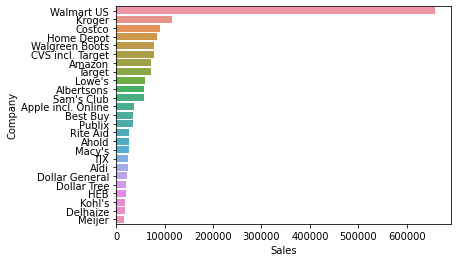

In [ ]:
sns.barplot(data=df, y="Company", x="Sales") # grafica de Ventas por compañia 

Entonces procedemos a observar lo que sucede cuando excluimos a Walmart US:

<AxesSubplot:xlabel='Sales', ylabel='Company'>

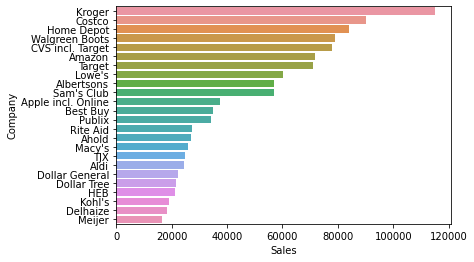

In [ ]:
df_swu = df_sorted[1:] # Un slice para quitar la compañia con mas ventas
sns.barplot(data=df_swu, y="Company", x="Sales") # La grafica anterior sin el dato mas grande.

Sin embargo, la distribución de los datos sigue sin tener una pauta de distribución normal:

<AxesSubplot:xlabel='Sales'>

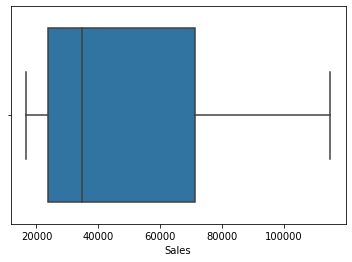

In [ ]:
sns.boxplot(x='Sales', data=df_swu) # Grafica de caja para observar la distribucion de los datos

**Finalmente, luego de muchos rodeos, este sería el promedio sin los datos de Walmart US:**

In [ ]:
# Impresion del nuevo promedio sin el dato de ventas mas grande.
print(f"Promedio: ${round(df_swu['Sales'].mean(),2)}") 

Promedio: $46602.42


El promedio de ventas se redujo de $71,063.08 a  $46,602.42

In [ ]:
# Calculo de la diferencia en porcentaje entre el promedio inicial y el promedio sin el dato mas elevado.
dif = round((71063.08-46602.42)*100/71063.08,2) 
print(f'Una reducción del {dif}% con la eliminacion de un solo resultado atipico')

Una reducción del 34.42% con la eliminacion de un solo resultado atipico


<h4>Resultados de la pregunta 1:</h4>

- El promedio de ventas se redujo de \$71,063.08 a  $46,602.42.
- Ocurrió una reducción del 34.42% con la eliminacion de un solo resultado atipico


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Comenzaremos&nbsp;elaborando un histograma de&nbsp;la&nbsp;columna&nbsp;"Sales"

<AxesSubplot:xlabel='Count', ylabel='Sales'>

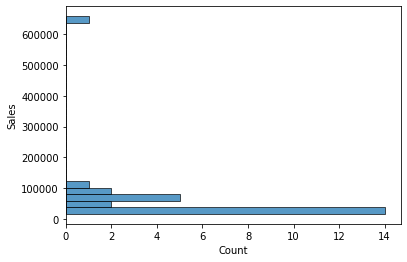

In [ ]:
# Grafica de barras con los valores de las ventas
sns.histplot(data=df,y="Sales",bins=30)

Hay un dato atípico que genera mucho ruido, probablemente se trate de las ventas de Walmart US, así que se repetirá la grafica de arriba sin el dato de Walmart con el dataset "df_swu" y para adelantarnos un poco, usaremos bines con un ancho de $20,000:

<AxesSubplot:xlabel='Count', ylabel='Sales'>

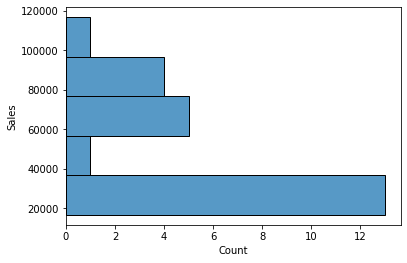

In [ ]:
# Grafica de barras con los valores de las ventas descontando el valor mas elevado.

sns.histplot(data=df_swu,y="Sales",binwidth=20000)

Recordando que en este caso que los valores mínimo y máximo son:

In [ ]:
print(f"Valor minimo = ${df_swu['Sales'].min()}\nValor Maximo= ${df_swu['Sales'].max()}")

Valor minimo = $16592
Valor Maximo= $115037


Observando la ultima grafica determinamos que se agrupan 13 compañías en el grupo grupo inferior de $20000 de ancho, entonces, con una ultima operación podemos determinar que:

In [ ]:
print(f"Entre las 25 companias del dataset hay 13 compañias que generaron entre " + 
      f"${df_swu['Sales'].min()} y ${df_swu['Sales'].min() + 20000}.")
print(f"Dicho de otra forma, el {13*100/25}% de las empresas generaron entre $16,592 y $36,592.")


Entre las 25 companias del dataset hay 13 compañias que generaron entre $16592 y $36592.
Dicho de otra forma, el 52.0% de las empresas generaron entre $16,592 y $36,592.


<h4>Conclusiones de la pregunta 2:</h4>

- Entre las 25 companias del dataset hay 13 compañias que generaron entre \$16,592 y $36,592.
- Dicho de otra forma, el 52.0% de las empresas generaron entre \$16,592 y $36,592.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

Volvemos a explorar toda la tabla:

In [ ]:
# Exploracion de las columnas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


Se considerará a la columna "Stores" como la que contiene la información relacionada con el numero de tiendas y se procederá a elaborar un histograma:

<AxesSubplot:xlabel='Count', ylabel='Stores'>

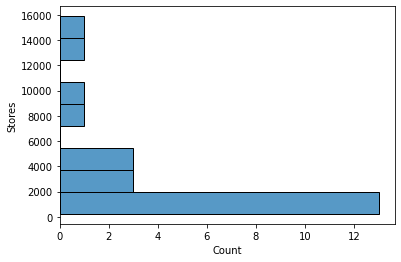

In [ ]:
# Se realiza la exploracion mediante la variacion de la variable binwidth
sns.histplot(y='Stores', data=df, binwidth=1740)

De la grafica anterior se puede determinar que el grupo inferior de 1740 tiendas de ancho abarca 13 tiendas, entonces

In [ ]:
percent = 13*100/25
min_stores = df['Stores'].min()
bin_w = 1740
print(f"El {percent}% de las compañias tienen entre {min_stores} y {min_stores + bin_w} tiendas.")

El 52.0% de las compañias tienen entre 231.0 y 1971.0 tiendas.


#### Conclusión de la pregunta 3:
- El 52.0% de las compañias tienen entre 231 y 1971 tiendas.


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Se nos pide compara la relación entre la cantidad de tiendas y el dinero generado, por ello se elabora un grafico de dispersión para compara estas dos variables:

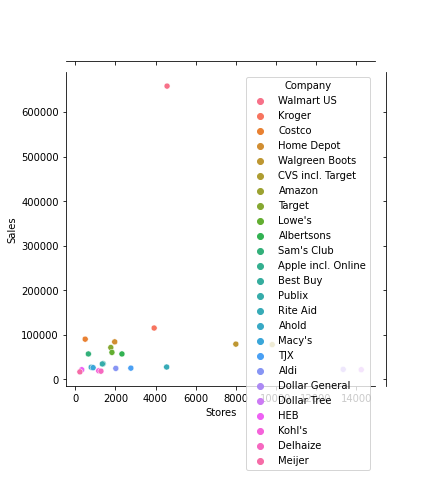

In [ ]:
sns.jointplot(data=df, x='Stores', y='Sales',hue='Company')

Una vez mas, el dato de Walmart Us Genera demasiado ruido para poder apreciar una tendencia, así que usaremos los datos sin este punto (df_swu)

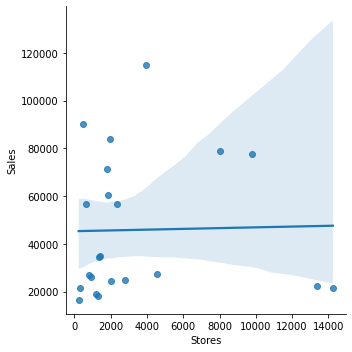

In [ ]:
sns.lmplot(data=df_swu, x='Stores', y='Sales')

#### Observaciones de la pregunta 4:
- Se graficó añadiendo una línea de tendencia y un indicador visual de la desviación de los datos al comparar la cantidad de tiendas en el eje X con las ventas en el eje Y.
- Se puede observar que **los datos se alejan de la línea** y la desviación de los datos se vuelve cada vez mas grande a medida que se incrementa la cantidad de tiendas. 
#### Conclusiones de la pregunta 4:
- **Las dos compañías con mas tiendas** están *visiblemente* cerca del nivel de ventas de las tiendas que tienen **menos ingresos**.
- Se puede concluir que **no hay relacion** entre la cantidad de tiendas y el nivel de ingresos de la compañia

### 5. ¿Cuál es el rango que existe entre las ventas?

El intervalo entre la tienda que genera menos ingresos y la tienda que genera mas ingresos se determina con la siguiente metodología: 

In [ ]:
gan_max = df['Sales'].max()
gan_min = df['Sales'].min()
print(f"El rango que existe entre los ingresos de las diferentes comañias " +
      f"esta entre los ${gan_min} y los ${gan_max}.")

El rango que existe entre los ingresos de las diferentes comañias esta entre los $16592 y los $658119.


#### Conclusión de la pregunta 5:
- El rango que existe entre los ingresos de las diferentes comañias esta entre los $16592 y los $658119.


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Primero organizamos los datos de manera descendente en función del numero de tiendas físicas

In [ ]:
df_sort_nstores = df.sort_values('Stores', ascending=0)
df_sort_nstores.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


Procedemos a verificar cuales son las 5 compañías con mas tiendas físicas.

In [ ]:
more_phy_s = df_sort_nstores['Company'][:5]
list_more_ps = list(more_phy_s)
print('Las cinco compañias con mas sucursales son: ')
for i in range(len(list_more_ps)):
    print('- ' + list_more_ps[i])


Las cinco compañias con mas sucursales son: 
- Dollar Tree
- Dollar General
- CVS incl. Target
- Walgreen Boots
- Walmart US


Modificamos el código que acabamos de usar para obtener las cinco compañías con mas ingresos:

In [ ]:
# Recordamos que ya teniamos organizados los datos en esta variable en funcion de la cantidad de ventas
df_sorted.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
more_sales = df_sorted['Company'][:5]
list_more_sales = list(more_sales)
print('Las cinco compañias con mas ventas son: ')
for i in range(len(list_more_sales)):
    print('- ' + list_more_sales[i])

Las cinco compañias con mas ventas son: 
- Walmart US
- Kroger
- Costco
- Home Depot
- Walgreen Boots


Finalmente comparamos las dos listas obtenidas para ver si hay coincidencias:

In [ ]:
print('Las compañias que estan entre las 5 con mas ingresos y las 5 con mas sucursales fisicas son:')
for i in range(len(list_more_ps)):
    for j in range(len(list_more_ps)):
        if list_more_ps[i] == list_more_sales[j]:
            print('- ' + list_more_sales[j])

Las compañias que estan entre las 5 con mas ingresos y las 5 con mas sucursales fisicas son:
- Walgreen Boots
- Walmart US


#### Conclusión de la pregunta 6:
- Las compañias que estan entre las 5 con mas ingresos y las 5 con mas sucursales fisicas son:
    - Walgreen Boots
    - Walmart US

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

Iniciamos con una grafica para comparar categorías con ventas

<AxesSubplot:xlabel='Sales', ylabel='Category'>

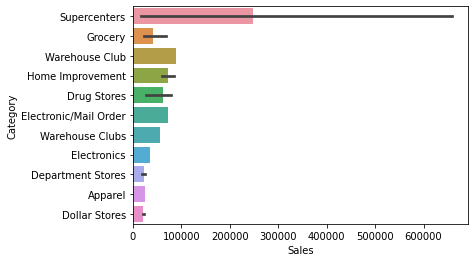

In [ ]:
sns.barplot(data=df, x='Sales', y='Category')

En la grafica de arriba se observa que la barra de "Supercenters" tiene los valores mas altos, pero también indica un error considerable, así que se procede a aislar los datos de interés y construir un dataset en donde se comparan las categorías con la suma de todas las ventas asociadas a cada categoría y después realizar una grafica de barras:

<AxesSubplot:xlabel='Sales', ylabel='Category'>

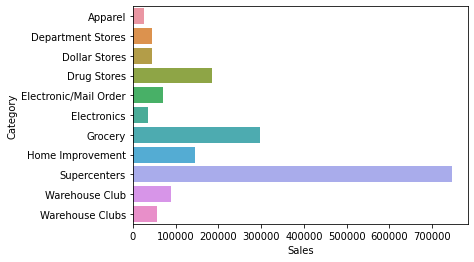

In [ ]:
category_df = df.groupby('Category')['Sales'].sum()
dict(category_df)
arr_dict = {
    'Category': [],
    'Sales': []
}
for i,j in dict(category_df).items():
    arr_dict['Category'].append(i)
    arr_dict['Sales'].append(j)

pd_df_cat_sales = pd.DataFrame(arr_dict)

sns.barplot(data=pd_df_cat_sales, x='Sales', y='Category')


#### Conclusion de la pregunta 7:
- En la grafica de arriba se puede confirmar que la categoria de **"Supercenters"** aglomera la mayor cantidad de ingresos.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Se partirá de crear otro dataframe con una nueva columna con el resultado de hacer la división "Sales"/"Stores"

In [ ]:
df['salestores'] = df['Sales']/df['Stores']
df.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,salestores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034


Ahora tenemos la nueva columna "salestores" con el resultado de dividir la los ingresos entre el numero de tiendas físicas.

Text(0, 0.5, 'Compañias')

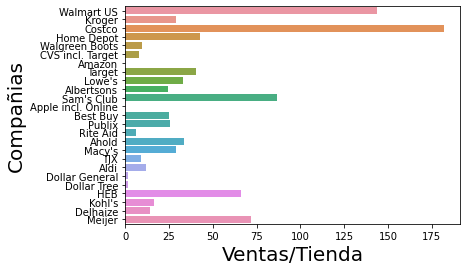

In [ ]:
p_c_v_s = sns.barplot(x="salestores", y="Company", data=df)
p_c_v_s.set_xlabel("Ventas/Tienda", fontsize = 20)
p_c_v_s.set_ylabel("Compañias", fontsize = 20)

#### Consusiones de la pregunta 8:
- Observando la grafica de arriba podemos afirmar que la compañia que genera mas ingresos por tienda es Costco, seguida por Walmart US.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Empezaremos buscando los valores no disponibles en la columna Stores, asumiendo que las compañías que venden exclusivamente online no tienen tiendas físicas:

In [ ]:
df[df['Stores'].isna()]['Company']

6                 Amazon
11    Apple incl. Online
Name: Company, dtype: object

Vamos a modificar el dataframe para cambiar los valores de "Cateogry" de estas empresas por "Online" para poder visualizar estas compañías en una grafica

In [ ]:
df['type_phy_onl'] = np.where(df['Stores'].isna(), 'Online', 'Physical')
df.head(10)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,type_phy_onl
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,Physical
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,Physical
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,Physical
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,Physical
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,Physical


Luego realizaremos una grafica de barras para comparar el desempeño de estas dos compañías con relación a las demás

<AxesSubplot:xlabel='Sales', ylabel='Company'>

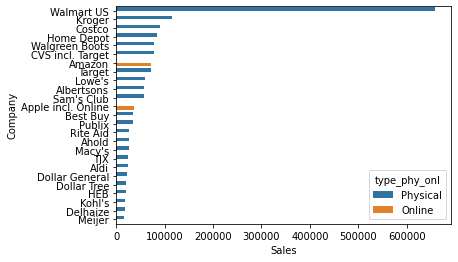

In [ ]:
sns.barplot(data=df,x="Sales", y="Company", hue="type_phy_onl")

Finalmente compararemos los ingresos de las empresas de venta online con las tiendas físicas.

<AxesSubplot:xlabel='Type', ylabel='Sales'>

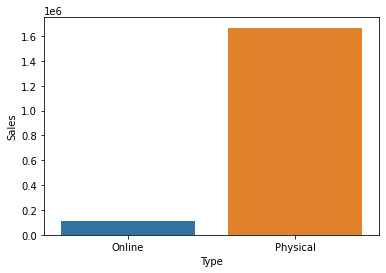

In [ ]:
online_df = df.groupby('type_phy_onl')['Sales'].sum()
dict(online_df)
arr_online_dict = {
    'Type': [],
    'Sales': []
}
for i,j in dict(online_df).items():
    arr_online_dict['Type'].append(i)
    arr_online_dict['Sales'].append(j)

pd_df_type_online = pd.DataFrame(arr_online_dict)

sns.barplot(data=pd_df_type_online, x='Type', y='Sales')

In [ ]:
online_sales = arr_online_dict["Sales"][0]
physical_sales = arr_online_dict["Sales"][1]

percentage_online = round(online_sales*100/physical_sales, 2)

print(f'Las ventas de compañias que venden exclusivamente online ' +
      f'representan el {percentage_online}% del total de las ventas')

Las ventas de compañias que venden exclusivamente online representan el 6.56% del total de las ventas


#### Conclusiones de la pregunta 9:
- Las ventas de compañias que venden exclusivamente online representan el 6.56% del total de las ventas
- Con el dato anterior y las graficas, podemos concluir que las compañias que venden exclusivamente online representan una fraccion muy pequeña de las ganancias de todas las empresas del dataset.

## III. Tus propias preguntas

### 10. ¿Alguna de las 5 compañias que *menos* ganan (Sales) esta entre las 5 compañias que estan abriendo *mas* sucursales (Store Count Growth)?

In [ ]:
df.tail(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,type_phy_onl
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,Physical
21,HEB,21384,323.0,66.825000,0.018927,Grocery,Physical
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores,Physical
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery,Physical
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,Physical


Volvemos a usar el código de la pregunta 5.

In [ ]:
less_sales = df_sorted['Company'][-5:]
list_less_sales = list(less_sales)
print('Las cinco compañias con menos ventas son: ')
for i in range(len(list_less_sales)):
    print('- ' + list_less_sales[i])

Las cinco compañias con menos ventas son: 
- Dollar Tree
- HEB
- Kohl's
- Delhaize
- Meijer


Y lo adaptamos para obtener las empresas que mas sucursales están abriendo (Store Count Growth)

In [ ]:
df_growth_sort = df.sort_values('Store Count Growth', ascending=0)
df_growth_sort.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,type_phy_onl
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,Physical
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,Physical
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,Physical
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,Physical
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,Physical


In [ ]:
more_growth = df_growth_sort['Company'][:5]
list_more_growth = list(more_growth)
print('Las cinco compañias con mayor incremento de sucursales son: ')
for i in range(len(list_more_growth)):
    print('- ' + list_more_growth[i])

Las cinco compañias con mayor incremento de sucursales son: 
- CVS incl. Target
- Dollar General
- Aldi
- Meijer
- Macy's


Comparamos las dos listas resultantes para obtener la respuesta:

In [ ]:
print('Las compañias que estan entre las 5 con menos* ingresos y las 5 con mayor incremento de sucursales fisicas son:')
for i in range(len(list_more_growth)):
    for j in range(len(list_more_growth)):
        if list_more_growth[i] == list_less_sales[j]:
            print('- ' + list_less_sales[j])

Las compañias que estan entre las 5 con menos* ingresos y las 5 con mayor incremento de sucursales fisicas son:
- Meijer


#### Resultados de la pregunta 10:

- La compañia **Meijer** se las arregla para estar entre las 5 empresas con **menos** ingresos y las 5 empresas con **mayor** incremento de sucursales fisicas lo que representa un comportamiento alejado de lo que se pordria esperar.

## 11. ¿Qué categoria obtiene mas ganancias por tienda en promedio?

Volvemos a construir la columna de ventas por tienda (salestores):

In [ ]:
df['salestores'] = df['Sales']/df['Stores']
df.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,type_phy_onl,salestores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,Physical,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,Physical,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,Physical,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,Physical,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,Physical,9.863034


Creamos un dataset resumido con los datos de interés para elaborar una grafica comparativa

<AxesSubplot:xlabel='salestores', ylabel='Category'>

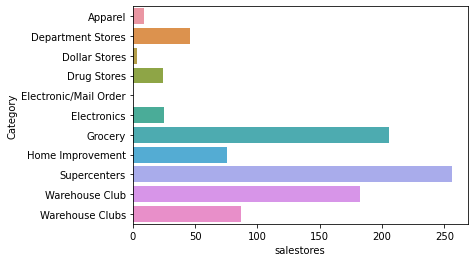

In [ ]:
salestores_df = df.groupby('Category')['salestores'].sum()
dict(salestores_df)
arr2_dict = {
    'Category': [],
    'salestores': []
}
for i,j in dict(salestores_df).items():
    arr2_dict['Category'].append(i)
    arr2_dict['salestores'].append(j)

pd_df_salestores = pd.DataFrame(arr2_dict)

sns.barplot(data=pd_df_salestores, x='salestores', y='Category')

In [ ]:
n_warehouses = round(dict(salestores_df)['Warehouse Club'] + dict(salestores_df)['Warehouse Clubs'], 2)
n_supercenters = round(dict(salestores_df)['Supercenters'], 2)

print(f'Los supercenters suman ${n_supercenters} en ventas por tienda, sin embargo, si asumimos ' + 
       'que los Warehouse Club y Warehouse Clubs son una sola categoria,' +
      f' estos sumarian ${n_warehouses} en ventas por tienda.')

Los supercenters suman $255.89 en ventas por tienda, sin embargo, si asumimos que los Warehouse Club y Warehouse Clubs son una sola categoria, estos sumarian $268.68 en ventas por tienda.


#### Conclusiones de la pregunta 11:
- No solo son la categoria que genera mas ganacias, los supercenters son la categoria que genera mas ingresos por cada tienda.
- Los supercenters suman **\$255.89** en ventas por tienda, sin embargo, **si asumimos que los Warehouse Club y Warehouse Clubs son una sola categoria**, estos sumarian **$268.68** en ventas por tienda, **superando a los Supercenters**


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e8aebff-15c4-4e8a-a7e7-191904fddb88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>